In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(10000, 13)

In [4]:
df.sample(5)

,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,admission_type,discharge_date,medication,test_results
3832,37,Female,A+,Asthma,2023-07-24,Garrett Brock,"Barnett, Norman and Meyer",Aetna,45316.818431,Elective,2023-08-22,Penicillin,Abnormal
5667,64,Female,AB-,Cancer,2022-05-27,Julian Cooper,"Wagner, Rodriguez and Walls",Blue Cross,12251.998893,Elective,2022-06-18,Paracetamol,Abnormal
683,79,Male,A+,Hypertension,2023-02-19,Kendra Shields,"Macdonald, Graves and English",Cigna,43699.093392,Emergency,2023-03-06,Penicillin,Abnormal
8044,19,Male,A-,Obesity,2023-06-01,Jennifer Potts,Mitchell-Bates,Aetna,28633.651511,Emergency,2023-06-11,Ibuprofen,Abnormal
8707,24,Female,A-,Obesity,2023-07-11,Brandon Cantrell,Winters-Braun,Blue Cross,2894.033296,Elective,2023-08-10,Paracetamol,Inconclusive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   gender              10000 non-null  object 
 2   blood_type          10000 non-null  object 
 3   medical_condition   10000 non-null  object 
 4   date_of_admission   10000 non-null  object 
 5   doctor              10000 non-null  object 
 6   hospital            10000 non-null  object 
 7   insurance_provider  10000 non-null  object 
 8   billing_amount      10000 non-null  float64
 9   admission_type      10000 non-null  object 
 10  discharge_date      10000 non-null  object 
 11  medication          10000 non-null  object 
 12  test_results        10000 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,age,billing_amount
count,10000.000000,10000.000000
mean,51.452200,25516.806778
std,19.588974,14067.292709
min,18.000000,1000.180837
25%,35.000000,13506.523967
50%,52.000000,25258.112566
75%,68.000000,37733.913727
max,85.000000,49995.902283


- how age depends on medical condition;
- how age depends on billing amount;
- how age depends on admission type;
- how test results depends on age;
- how blood type depends on gender;
- how medical condition depends on gender (with age);
- how admission type depends on age;
- how blood type depends on meidcal condition;
- how blood type depends on admission type, medication, test results;
- how medical condition, admission type depends on time spent in hospital;
- how medical condition depends on billing amount;
- how medical condition depends on admission type;
- how billing amount, medication depends on doctor;
- how admission type depends on medication, test results;
- how medication depends on test results;

# Medical condition vs Age

In [7]:
df["medical_condition"].value_counts()

medical_condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

## Asthma distribution

In [10]:
asthma_df = df[df.medical_condition == "Asthma"][["medical_condition", "age"]]
asthma_df.value_counts()

medical_condition  age
Asthma             78     32
                   55     32
                   63     32
                   48     31
                   64     31
                          ..
                   50     19
                   52     18
                   82     17
                   85     17
                   37     16
Name: count, Length: 68, dtype: int64

In [ ]:
asthma_age = asthma_df["Age"]

In [ ]:
asthma_age.min()

In [ ]:
asthma_age.max()

In [ ]:
ax_asthma = asthma_age.plot(kind="kde", figsize=(10, 5), title="Asthma distribution")
ax_asthma.set_xlabel("Age")

## Cancer distribution

In [ ]:
cancer_df = df[df.Medical_Condition == "Cancer"]

In [ ]:
cancer_age = cancer_df["Age"]

In [ ]:
cancer_age.value_counts()

In [ ]:
ax_cancer = cancer_age.plot(kind="kde", figsize=(10, 5), title="Cancer distribution")
ax_cancer.set_xlabel("Age")

## Hypertension distribution

In [ ]:
hypertension_df = df[df.medical_condition == "Hypertension"]

In [ ]:
hypertension_age = hypertension_df["age"]

In [ ]:
hypertension_age.value_counts()

In [ ]:
ax_hypertension = hypertension_age.plot(kind="kde", figsize=(10, 5), title="Hypertension distribution")
ax_hypertension.set_xlabel("Age")

## Arthritis distribution

In [ ]:
arthritis_df = df[df.medical_condition == "Arthritis"]

In [ ]:
arthritis_age = arthritis_df["age"]

In [ ]:
ax_arthritis = arthritis_age.plot(kind="kde", figsize=(10, 5), title="Arthritis distribution")
ax_arthritis.set_xlabel("Age")

## Obesity distribution

In [ ]:
obesity_df = df[df.medical_condition == "Obesity"]

In [ ]:
obesity_age = obesity_df["age"]

In [ ]:
ax_obesity = obesity_age.plot(kind="kde", figsize=(10, 5), title="Obesity distribution")
ax_obesity.set_xlabel("Age")

## Diabetes distribution

In [ ]:
diabetes_df = df[df.medical_condition == "Diabetes"]

In [ ]:
diabetes_age = diabetes_df["age"]

In [ ]:
diabetes_ax = diabetes_age.plot(kind="kde", figsize=(10, 5), title="Diabetes distribution")
diabetes_ax.set_xlabel("Age")

# Age vs Billing Amount

In [ ]:
df.billing_amount.max()

In [ ]:
df.billing_amount.min()

In [ ]:
df.plot(kind="scatter", x="billing_amount", y="age", figsize=(10, 5), title="Age vs Billing amount")
plt.show()

# Admission type vs Age

In [ ]:
df["admission_type"].value_counts()

In [20]:
admission_type_groups = df.groupby("admission_type")

## Urgent type vs age

In [21]:
urgent_group = admission_type_groups.get_group("Urgent")

Text(0.5, 0, 'Age')

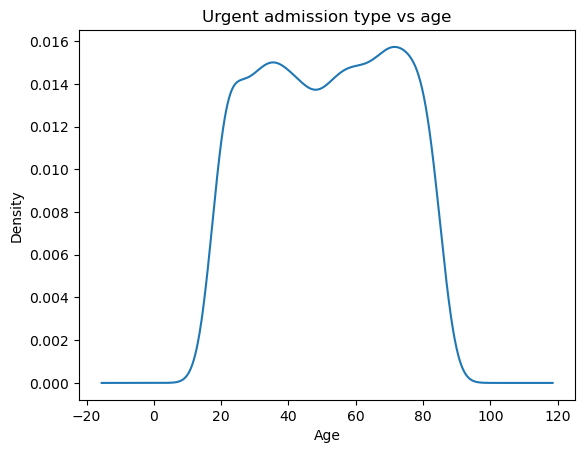

In [22]:
ax_urgent = urgent_group.age.plot(kind="kde", title="Urgent admission type vs age")
ax_urgent.set_xlabel("Age")

## Emergency type vs age

In [ ]:
emergency_group = admission_type_groups.get_group("Emergency")

In [ ]:
ax_emergency = emergency_group.age.plot(kind="kde", title="Emergency admission type vs age")
ax_emergency.set_xlabel("Age")

## Elective type vs age

In [ ]:
elective_group = admission_type_groups.get_group("Elective")

In [ ]:
ax_elective = elective_group.age.plot(kind="kde", title="Elective admission type vs age")
ax_elective.set_xlabel("Age")

# Test results vs age

In [11]:
df.test_results.value_counts()

test_results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

In [25]:
test_results_groups = df.groupby("test_results")

In [31]:
age_groups = test_results_groups["age"].value_counts().unstack()
age_groups

age,18,19,20,21,22,23,24,25,26,27,...,76,77,78,79,80,81,82,83,84,85
test_results,,,,,,,,,,,,,,,,,,,,,
Abnormal,59,50,58,46,49,46,46,52,47,40,...,43,53,65,54,34,58,42,43,50,48
Inconclusive,52,39,55,53,31,69,49,57,49,48,...,57,46,61,44,43,52,50,39,34,39
Normal,53,43,56,54,43,40,41,40,57,37,...,45,54,48,53,53,49,55,49,49,36


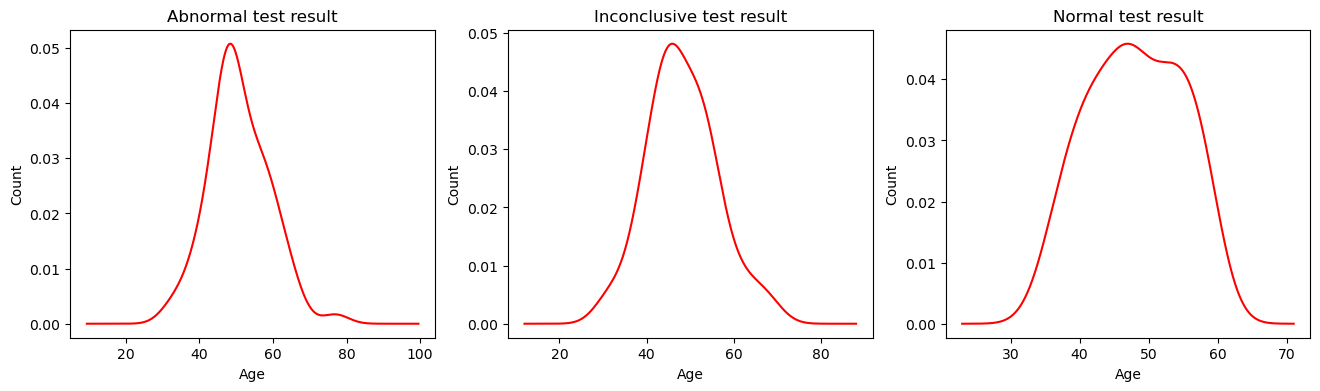

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=len(age_groups), figsize=(16, 4))

for idx, (result, counts) in enumerate(age_groups.iterrows()):
    counts.plot(kind="kde", ax=axes[idx], color=["r", "g"])
    axes[idx].set_title(f"{result} test result")
    axes[idx].set_xlabel("Age")
    axes[idx].set_ylabel("Count")